In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load the Data
file_path = 'Raw Data/output.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display information about the dataset
print(data.info())

   Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0       1   M     43.2555       30.8421      25.9025   6.3     Yes
1       2   F     45.6033       28.1900      26.2067  13.5      No
2       3  F      45.0107       28.9677      26.0215  11.7      No
3       4   F     44.5398       28.9899      26.4703  13.5      No
4       5  M      43.2870       30.6972      26.0158  12.4      No
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB
None


In [5]:
# Summary statistics for numerical columns
summary_stats = data.describe()
print(summary_stats)

           Number  %Red Pixel  %Green pixel  %Blue pixel          Hb
count  104.000000  104.000000    104.000000   104.000000  104.000000
mean    52.500000   45.654175     28.875507    25.470325   12.150962
std     30.166206    2.816294      1.554275     1.984671    2.512957
min      1.000000   38.796800     25.140300    19.541300    2.800000
25%     26.750000   43.911375     27.871300    24.896425   10.650000
50%     52.500000   45.385350     28.948750    25.953200   12.600000
75%     78.250000   46.968325     29.887275    26.721600   14.000000
max    104.000000   54.647800     32.368100    29.841400   16.300000


In [6]:
# Check for missing values
print(data.isnull().sum())

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64


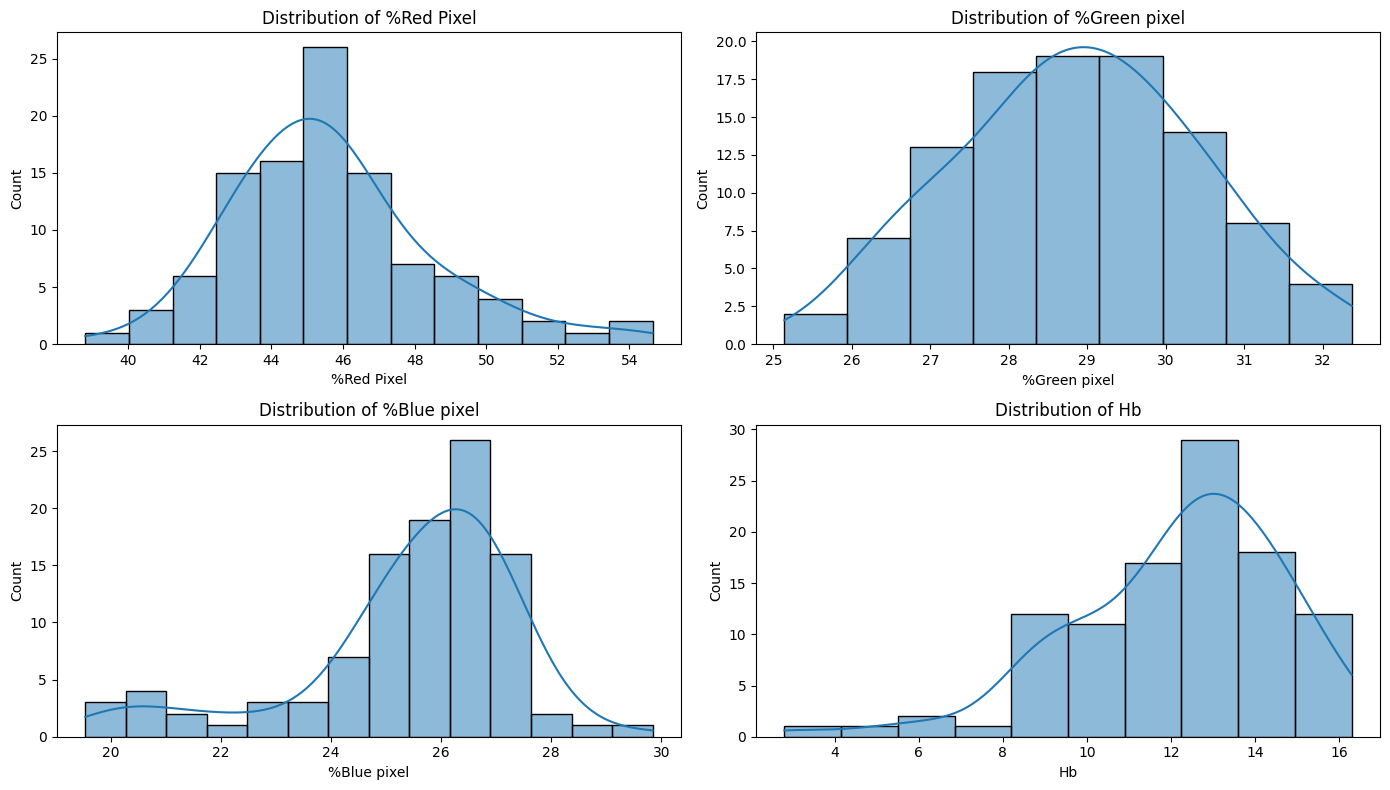

In [7]:
#Distribution plots for numerical features
plt.figure(figsize=(14, 8))
for i, column in enumerate(['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

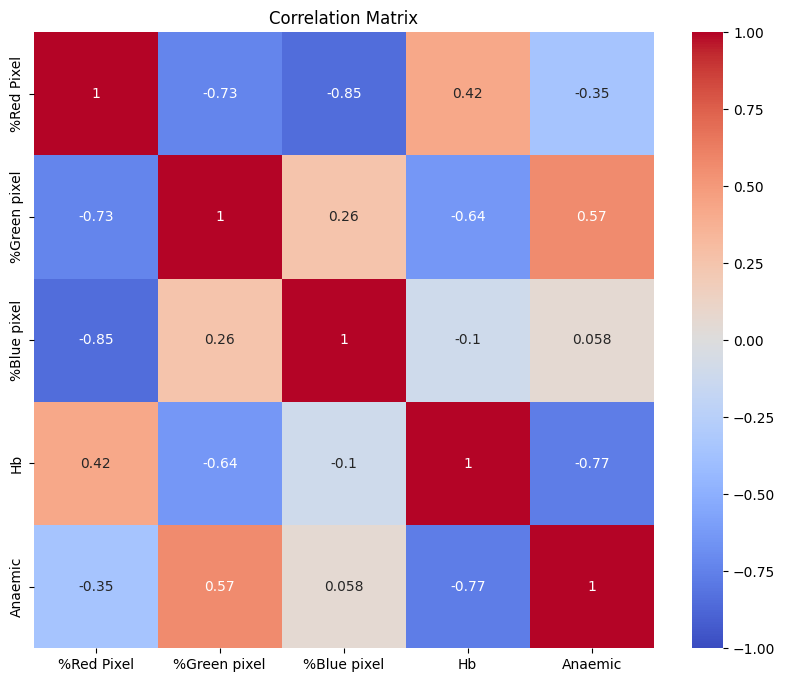

In [10]:
#Creating a heatmap
# Convert the target variable 'Anaemic' to a binary format
data['Anaemic'] = data['Anaemic'].map({'Yes': 1, 'No': 0})

# Correlation matrix
correlation_matrix = data[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Observations: 
Hemoglobin (Hb) has a strong negative correlation with ‘Anaemic’, indicating that lower hemoglobin levels are associated with a higher likelihood of being anemic.

%Red Pixel, %Green pixel, and %Blue pixel show weaker correlations with ‘Anaemic’.

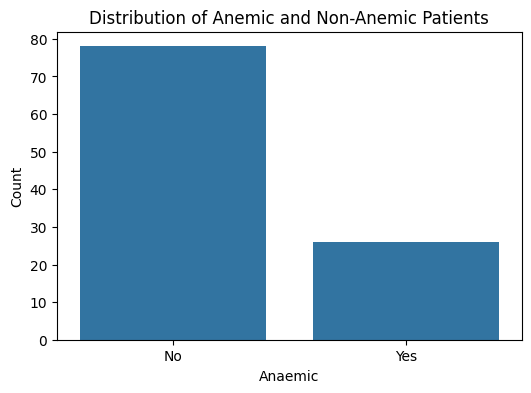

In [11]:
# Plot the distribution of 'Anaemic'
plt.figure(figsize=(6, 4))
sns.countplot(x='Anaemic', data=data)
plt.title('Distribution of Anemic and Non-Anemic Patients')
plt.xlabel('Anaemic')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Observations
The distribution plot of the target variable ‘Anaemic’ shows that there are more non-anemic patients (No) compared to anemic patients (Yes) in the dataset. This indicates a class imbalance that we may need to address during the modeling phase.

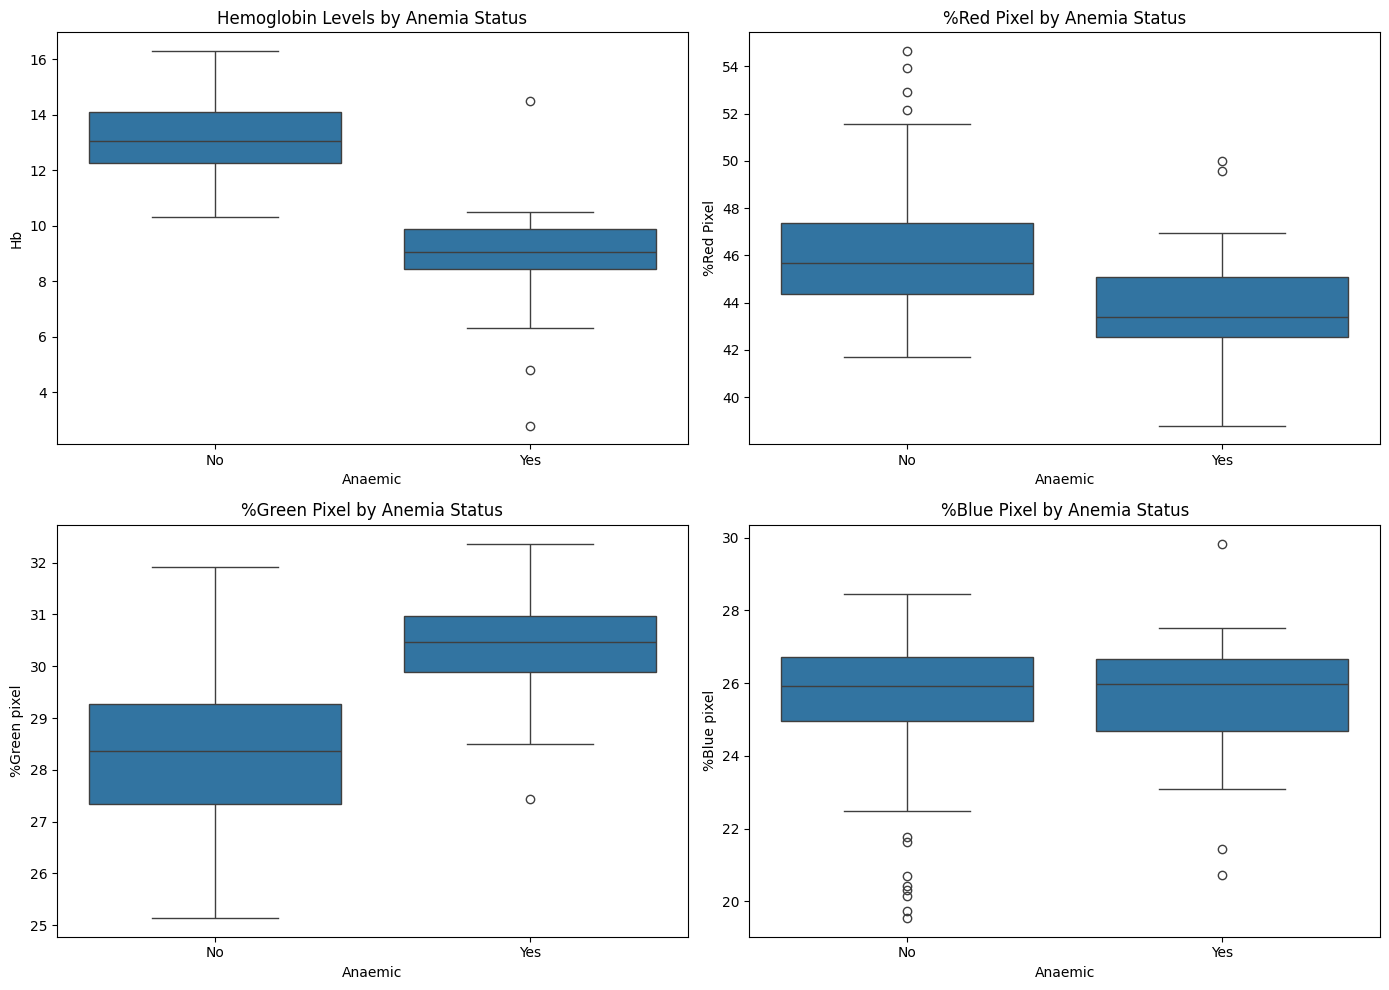

In [13]:
# Distribution of key features with respect to 'Anaemic'
plt.figure(figsize=(14, 10))

# List of features and titles to plot
features = ['Hb', '%Red Pixel', '%Green pixel', '%Blue pixel']
titles = ['Hemoglobin Levels by Anemia Status', '%Red Pixel by Anemia Status', '%Green Pixel by Anemia Status', '%Blue Pixel by Anemia Status']

for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='Anaemic', y=feature, data=data)
    plt.title(titles[i])
    plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

Observations
The box plots show the distribution of hemoglobin levels and pixel percentages across anemic and non-anemic patients. The hemoglobin levels of anemic patients are generally lower, with one severe outlier present in the hemoglobin levels of non-anemic patients. This outlier could be due to measurement errors or true variations.

Similarly, the red and blue pixel percentages show some outliers. These outliers might impact the model’s performance. For the initial model building, I will keep these outliers to observe their effect. If the model’s performance is significantly affected, I will consider removing or transforming the outliers in subsequent iterations.
